parsing xml => xmltodict
métriques d'évaluation => pyennote.metrics

In [29]:
# Importation des packages
import os
import numpy as np
import cv2
import moviepy.editor as mp
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
import librosa.display

In [15]:
# Importation des données
# clip=mp.VideoFileClip('06-11-22.mp4')
# clip.audio.write_audiofile('audio.wav')

In [16]:
sample_rate, audio = wavfile.read("audio.wav")
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 2350.88s


In [17]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

In [18]:
normalize_audio(audio)

array([[-0.00767571, -0.00767571],
       [-0.00557953, -0.00557953],
       [-0.0005857 , -0.0005857 ],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

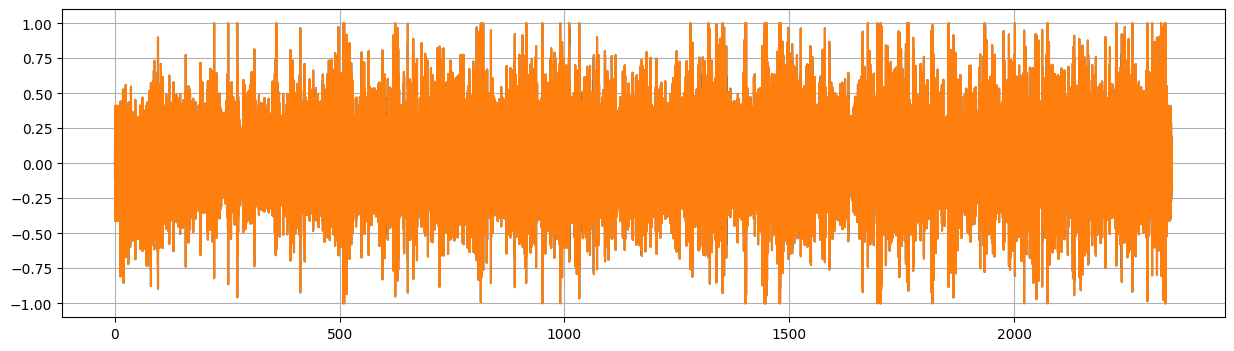

In [19]:
audio = normalize_audio(audio)
# plt.figure(figsize=(15,4))
# plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
# plt.grid(True)

In [33]:
audio_path = 'audio.wav'
x, sr = librosa.load(audio_path)

In [36]:
x,sr

(array([-0.00564221, -0.00133275,  0.0019629 , ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 22050)

### Mel spectrogram
This first step will show how to compute a Mel spectrogram from an audio waveform.

In [39]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)
S

array([[5.80259375e-02, 5.21821044e-02, 5.51293865e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23488824e-02, 6.35496750e-02, 9.39505994e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.18389623e-02, 2.16695759e-02, 3.62080485e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.14485873e-06, 1.24731305e-05, 9.89013824e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.95725101e-07, 4.15573709e-07, 2.12907253e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34863649e-08, 6.09598416e-09, 3.49443863e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [41]:
from librosa import logamplitude

ImportError: cannot import name 'logamplitude' from 'librosa' (c:\Users\INTERNET_DIGITAL\mambaforge\lib\site-packages\librosa\__init__.py)

In [44]:
# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S)
log_S

array([[1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642],
       [1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642],
       [1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642],
       ...,
       [1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642],
       [1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642],
       [1.7664642, 1.7664642, 1.7664642, ..., 1.7664642, 1.7664642,
        1.7664642]], dtype=float32)

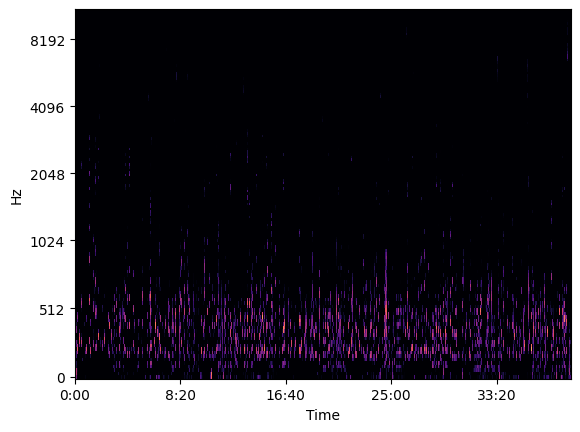

In [46]:
# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

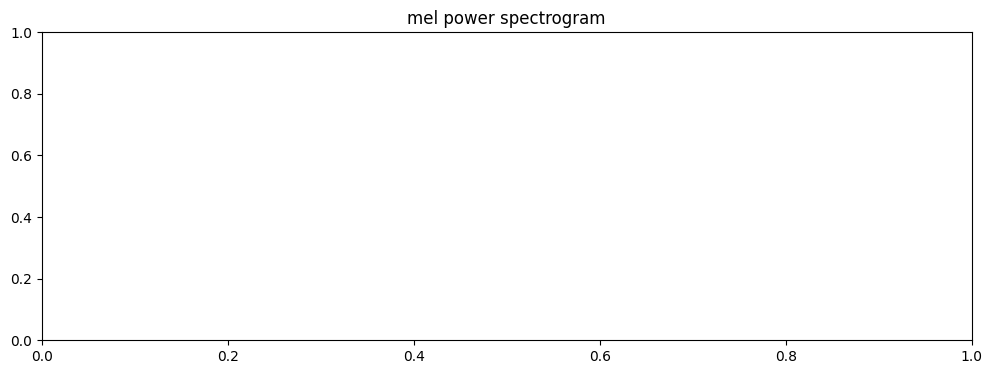

In [47]:
# Make a new figure
plt.figure(figsize=(12,4))

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [49]:
## Examining Mel object
len(S), len(S[0])

(128, 101244)

In [51]:
## Rotating Mel table clockwise 3 times

S_rot=np.rot90(S,3)

len(S_rot), len(S_rot[0])

(101244, 128)

### MFCC
Mel-frequency cepstral coefficients are commonly used to represent texture or timbre of sound.

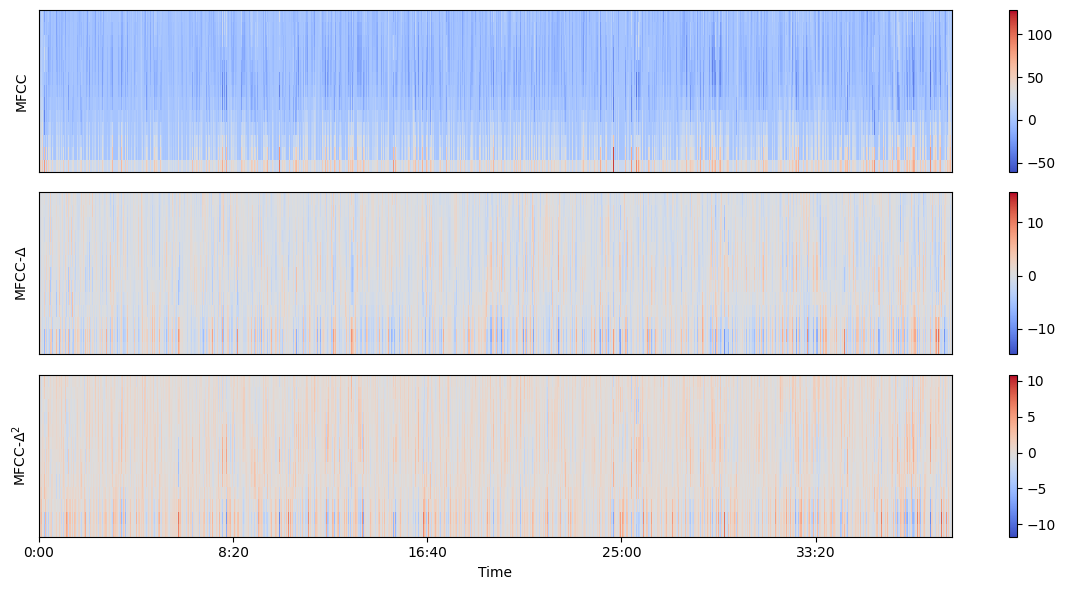

In [53]:
# Next, we'll extract the first 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

In [54]:
## Time test: Load WAV and extract 128 Mel coefficients

import time

start_time = time.time()

x, sr = librosa.load(wav_pathname)

mel_128=librosa.feature.mfcc(S=log_S, n_mfcc=128)

print("%s" % (time.time() - start_time)+" seconds")

NameError: name 'wav_pathname' is not defined

In [ ]:
## Time test: Load WAV and extract 13 Mel coefficients

import time

start_time = time.time()

x, sr = librosa.load(wav_pathname)

mel_13=librosa.feature.mfcc(S=log_S, n_mfcc=13)

print("%s" % (time.time() - start_time))

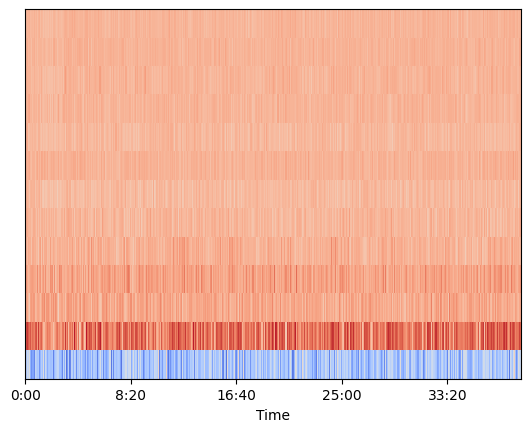

In [14]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [30]:
frequency_sampling, audio_signal = wavfile.read("audio.wav")
frequency_sampling

44100

In [29]:
audio_signal = audio_signal[:15000]
audio_signal

array([[-249, -249],
       [-181, -181],
       [ -19,  -19],
       ...,
       [2469, 2469],
       [2443, 2443],
       [2425, 2425]], dtype=int16)

In [31]:
features_mfcc = mfcc(audio_signal, frequency_sampling)

In [32]:
features_mfcc

array([[ 1.42772676e+01, -1.87299634e+00, -2.14342628e+01, ...,
        -6.47224226e+00, -1.48503023e+01, -2.12959654e+01],
       [ 1.48343212e+01,  1.19772258e+01, -2.40865165e+01, ...,
        -1.43994046e+01,  2.11560378e+01, -1.98100600e+01],
       [ 1.44586014e+01,  1.46302924e+01, -2.44526875e+01, ...,
        -1.78245312e+01,  2.00841867e+01, -2.55473543e+01],
       ...,
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  3.50716881e-14],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  3.50716881e-14],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  3.50716881e-14]])

In [34]:
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 470175
Length of each feature = 13


In [35]:
features_mfcc = features_mfcc.T

Text(0.5, 1.0, 'MFCC')

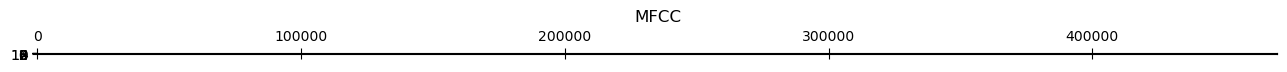

In [39]:
plt.matshow(features_mfcc)
plt.title('MFCC')